In [55]:
import numpy as np
import pandas as pd
import tables
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
import statistics
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [56]:
credit = pd.read_csv('default_of_creditcard_clients.csv')

credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [58]:
credit.rename(columns={'default payment next month': 'default_target'}, inplace=True)
credit.columns=credit.columns.str.lower()

In [59]:
credit.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [60]:
#dummy_df = pd.DataFrame(data=credit, columns=['pay_0', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'education', 'marriage'])

#categorical_cols = [col_name for col_name in dummy_df.dtypes[dummy_df.dtypes.values == 'int'].index]
#credit = pd.DataFrame(credit).append(dummy_df)
#dummy = pd.get_dummies(dummy_df[categorical_cols], drop_first=True, ignore_index=False)

#credit.info()

In [61]:
#dummy_df = pd.DataFrame(data=credit, columns=['pay_0', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'education', 'marriage'])

#categorical_cols = [col_name for col_name in dummy_df.dtypes[dummy_df.dtypes.values == 'int'].index]

#dummy = pd.get_dummies(dummy_df[categorical_cols], drop_first=True)


#credit = pd.concat([credit, dummy], axis=1)
#credit.head()

In [62]:
#col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
              #'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'education', 'bill_amt1', 'bill_amt2',
             # 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'marriage']

#credit[col_to_norm]=credit[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

In [63]:
credit.corr()['default_target'].sort_values(ascending=False)

default_target    1.000000
pay_0             0.324794
pay_2             0.263551
pay_3             0.235253
pay_4             0.216614
pay_5             0.204149
pay_6             0.186866
education         0.028006
age               0.013890
bill_amt6        -0.005372
bill_amt5        -0.006760
bill_amt4        -0.010156
id               -0.013952
bill_amt3        -0.014076
bill_amt2        -0.014193
bill_amt1        -0.019644
marriage         -0.024339
sex              -0.039961
pay_amt6         -0.053183
pay_amt5         -0.055124
pay_amt3         -0.056250
pay_amt4         -0.056827
pay_amt2         -0.058579
pay_amt1         -0.072929
limit_bal        -0.153520
Name: default_target, dtype: float64

In [64]:
# Y is the target variable
Y = credit['default_target']
# X is the feature set 
X = credit[['pay_0','pay_2', 'pay_3', 'limit_bal', 'pay_amt1', 'pay_amt2']]

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=credit.default_target, random_state=1)

In [65]:
X = sm.add_constant(X)

OLS_results = sm.OLS(Y, X).fit()

OLS_results.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         default_target   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     648.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:33:31   Log-Likelihood:                -14357.
No. Observations:               30000   AIC:                         2.873e+04
Df Residuals:                   29993   BIC:                         2.879e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2608      0.004     69.062      0.000       0.253       0.268
pay_0          0.0945      0.003     34.427      0.000       0.089       0.100
pay_2          0.0143      0.003      4.351      0.000       0.008       0.021
pay_3          0.0143      0.003      4.781      0.000       0.008       0.020
limit_bal  -1.611e-07   1.88e-08     -8.561      0.000   -1.98e-07   -1.24e-07
pay_amt1   -8.726e-07   1.45e-07     -6.018      0.000   -1.16e-06   -5.88e-07
pay_amt2   -2.977e-07   1.03e-07     -2.887      0.004      -5e-07   -9.56e-08
==============================================================================
Omnibus:                     4706.022   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7355.810
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       3.122   Cond. No.                     3.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

regr_cv = RidgeCV(alphas=[0.1, 1.0, 5, 10.0, 100, 500, 1000, 2000, 10**4, 10**6])
model_cv = regr_cv.fit(X_std, Y)
model_cv.alpha_


#print("The number of observations in training set is {}".format(X_train.shape[0]))
#print("The number of observations in test set is {}".format(X_test.shape[0]))

100.0

In [67]:
ridgeregr = Ridge(alpha=1000) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.11213719734130279
-----Test set statistics-----
R-squared of the model on the test set is: 0.12495982055318833
Mean absolute error of the prediction is: 0.30857332377362306
Mean squared error of the prediction is: 0.15023854090314964
Root mean squared error of the prediction is: 0.38760616726665953
Mean absolute percentage error of the prediction is: inf


In [68]:
 print(cross_val_score(ridgeregr, X, Y, cv=10)) 

[0.08396652 0.09580761 0.10654718 0.08799445 0.11438856 0.15361606
 0.13555033 0.09820126 0.11806673 0.1239857 ]


In [69]:
lasso_cv = LassoCV(alphas=[0.1, 1.0, 5, 10.0, 100, 500, 1500, 2000, 2500, 10**4, 10**6])
#lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0])
lasso_model_cv = lasso_cv.fit(X_std, Y)
lasso_model_cv.alpha_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1

In [70]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.1) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.060053284686606534
-----Test set statistics-----
R-squared of the model on the test set is: 0.06610953416296139
Mean absolute error of the prediction is: 0.32790483954278604
Mean squared error of the prediction is: 0.16034274110637883
Root mean squared error of the prediction is: 0.40042819719192957
Mean absolute percentage error of the prediction is: inf


In [71]:
 print(cross_val_score(lassoregr, X, Y, cv=10)) 

[0.04214949 0.05223115 0.05581927 0.04750567 0.06033472 0.07265034
 0.07637853 0.05522725 0.06984802 0.05882471]


In [72]:
elastic_cv = ElasticNetCV(alphas=[0.1, 1.0, 5, 10.0, 100, 500, 1500, 2000, 2500, 10**4, 10**6])
#lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0])
elastic_model_cv = elastic_cv.fit(X_std, Y)
elastic_model_cv.alpha_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1

In [73]:
elasticregr = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.096294942534207
-----Test set statistics-----
R-squared of the model on the test set is: 0.10472685118782776
Mean absolute error of the prediction is: 0.3174319675592727
Mean squared error of the prediction is: 0.15371240629469268
Root mean squared error of the prediction is: 0.3920617378611342
Mean absolute percentage error of the prediction is: inf


In [74]:
 print(cross_val_score(elasticregr, X, Y, cv=10)) 

[0.07473632 0.08430932 0.09095436 0.07786676 0.09774401 0.12178507
 0.11491959 0.08905116 0.10540523 0.10135312]


In [75]:
m_health = pd.read_csv('dmhasnsduhmh2016.csv')

In [76]:
m_health.head()

,Region,Year,Age Range,Mental Health,Measure Type,Variable,Value
0,Connecticut,2009-2010,12-17,Any Mental Illness in the Past Year,Percent,Mental Health,-6666.0
1,Connecticut,2009-2010,12-17,Had at Least One Major Depressive Episode in t...,Percent,Mental Health,-6666.0
2,Connecticut,2009-2010,12-17,Had Serious Thoughts of Suicide in the Past Year,Percent,Mental Health,-6666.0
3,Connecticut,2009-2010,12-17,Serious Mental Illness in the Past Year,Percent,Mental Health,-6666.0
4,Connecticut,2009-2010,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,-6666.0


In [77]:
m_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
Region           672 non-null object
Year             672 non-null object
Age Range        672 non-null object
Mental Health    672 non-null object
Measure Type     672 non-null object
Variable         672 non-null object
Value            672 non-null float64
dtypes: float64(1), object(6)
memory usage: 36.8+ KB


In [78]:
m_health.drop(m_health[m_health['Age Range'] == '12-17'].index, inplace = True) 
m_health.drop(m_health[m_health['Age Range'] == 'Over 17'].index, inplace = True)

m_health.drop(m_health[m_health['Value'] < 0].index, inplace = True)


In [79]:
m_health.head(8)

,Region,Year,Age Range,Mental Health,Measure Type,Variable,Value
20,Connecticut,2010-2011,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,18.05
21,Connecticut,2010-2011,18-25,Had at Least One Major Depressive Episode in t...,Percent,Mental Health,7.93
22,Connecticut,2010-2011,18-25,Had Serious Thoughts of Suicide in the Past Year,Percent,Mental Health,5.98
23,Connecticut,2010-2011,18-25,Serious Mental Illness in the Past Year,Percent,Mental Health,3.55
28,Connecticut,2010-2011,Over 25,Any Mental Illness in the Past Year,Percent,Mental Health,16.36
29,Connecticut,2010-2011,Over 25,Had at Least One Major Depressive Episode in t...,Percent,Mental Health,6.17
30,Connecticut,2010-2011,Over 25,Had Serious Thoughts of Suicide in the Past Year,Percent,Mental Health,3.24
31,Connecticut,2010-2011,Over 25,Serious Mental Illness in the Past Year,Percent,Mental Health,3.44


In [80]:
m_health['Mental Health'].unique()

array(['Any Mental Illness in the Past Year',
       'Had at Least One Major Depressive Episode in the Past Year',
       'Had Serious Thoughts of Suicide in the Past Year',
       'Serious Mental Illness in the Past Year'], dtype=object)

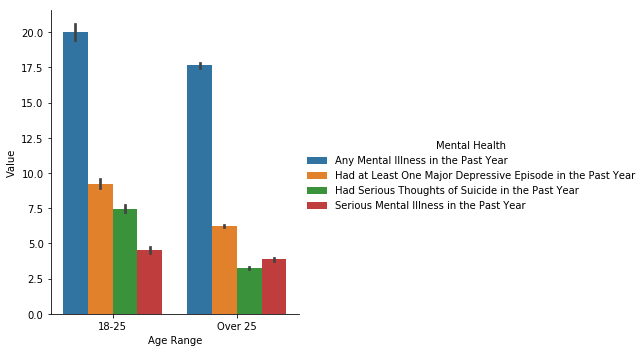

In [81]:
sns.catplot(x="Age Range", y="Value", hue="Mental Health", kind="bar", data=m_health);

In [82]:
#m_health.drop(m_health[m_health['Age Range'] == '12-17'].index, inplace = True) 
m_health.drop(m_health[m_health['Mental Health'] != 'Any Mental Illness in the Past Year'].index, inplace = True)
m_health.head()

,Region,Year,Age Range,Mental Health,Measure Type,Variable,Value
20,Connecticut,2010-2011,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,18.05
28,Connecticut,2010-2011,Over 25,Any Mental Illness in the Past Year,Percent,Mental Health,16.36
36,Connecticut,2011-2012,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,17.63
44,Connecticut,2011-2012,Over 25,Any Mental Illness in the Past Year,Percent,Mental Health,16.57
52,Connecticut,2012-2013,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,18.30


In [83]:
young_mean = m_health[(m_health['Mental Health'] == 'Any Mental Illness in the Past Year') & 
                      (m_health['Age Range'] == '18-25') & (m_health['Year'] == '2010-2011')].mean()

print(young_mean)

Value    18.391667
dtype: float64


In [84]:
older_mean = m_health[(m_health['Mental Health'] == 'Any Mental Illness in the Past Year') & 
                      (m_health['Age Range'] == 'Over 25') & (m_health['Year'] == '2010-2011')].mean()

print(older_mean)

Value    17.598333
dtype: float64


In [85]:
m_health['Value'].unique()

array([18.05, 16.36, 17.63, 16.57, 18.3 , 17.1 , 18.01, 16.19, 21.34,
       16.78, 23.48, 17.11, 18.99, 18.34, 19.59, 18.15, 19.86, 18.35,
       20.45, 18.29, 21.43, 17.81, 22.25, 17.3 , 18.37, 17.65, 18.97,
       17.4 , 19.89, 17.84, 20.8 , 17.39, 22.  , 17.07, 22.58, 17.27,
       17.69, 17.77, 18.22, 18.08, 18.48, 17.97, 19.31, 17.57, 20.5 ,
       17.53, 18.33, 17.83, 19.06, 18.04, 19.5 , 18.36, 19.75, 20.89,
       17.52, 21.89, 17.44, 19.34, 17.72, 20.63, 18.17, 21.07, 18.58,
       20.7 , 18.46, 22.03, 17.51, 23.21, 17.67])

In [86]:
dummy = pd.get_dummies(m_health['Mental Health'], drop_first=True)
dummy2 = pd.get_dummies(m_health['Age Range'], drop_first=True)

m_health = pd.concat([m_health, dummy, dummy2], axis=1)
m_health.head()

,Region,Year,Age Range,Mental Health,Measure Type,Variable,Value,Over 25
20,Connecticut,2010-2011,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,18.05,0
28,Connecticut,2010-2011,Over 25,Any Mental Illness in the Past Year,Percent,Mental Health,16.36,1
36,Connecticut,2011-2012,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,17.63,0
44,Connecticut,2011-2012,Over 25,Any Mental Illness in the Past Year,Percent,Mental Health,16.57,1
52,Connecticut,2012-2013,18-25,Any Mental Illness in the Past Year,Percent,Mental Health,18.30,0


In [87]:
m_health.corr()['Value'].sort_values(ascending=False)

Value      1.000000
Over 25   -0.683287
Name: Value, dtype: float64

In [88]:
m_health['Value'].describe()

count    72.000000
mean     18.821528
std       1.717982
min      16.190000
25%      17.645000
50%      18.255000
75%      19.777500
max      23.480000
Name: Value, dtype: float64

In [89]:
health = m_health[['Mental Health', 'Value', 'Over 25']]

health.head()

,Mental Health,Value,Over 25
20,Any Mental Illness in the Past Year,18.05,0
28,Any Mental Illness in the Past Year,16.36,1
36,Any Mental Illness in the Past Year,17.63,0
44,Any Mental Illness in the Past Year,16.57,1
52,Any Mental Illness in the Past Year,18.30,0


In [90]:
def calculate_mental_health(row): 
    if row['age'] > 26:
        return older_mean
    else:
        return young_mean

credit['ment_health_percent'] = credit.apply(calculate_mental_health, axis=1)

In [91]:
credit.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_target,ment_health_percent
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,18.391667
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,18.391667
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,17.598333
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,17.598333
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,17.598333


In [92]:
credit.corr()['default_target'].sort_values(ascending=False)

default_target         1.000000
pay_0                  0.324794
pay_2                  0.263551
pay_3                  0.235253
pay_4                  0.216614
pay_5                  0.204149
pay_6                  0.186866
ment_health_percent    0.032197
education              0.028006
age                    0.013890
bill_amt6             -0.005372
bill_amt5             -0.006760
bill_amt4             -0.010156
id                    -0.013952
bill_amt3             -0.014076
bill_amt2             -0.014193
bill_amt1             -0.019644
marriage              -0.024339
sex                   -0.039961
pay_amt6              -0.053183
pay_amt5              -0.055124
pay_amt3              -0.056250
pay_amt4              -0.056827
pay_amt2              -0.058579
pay_amt1              -0.072929
limit_bal             -0.153520
Name: default_target, dtype: float64

In [93]:
# Y is the target variable
Y2 = credit['default_target']
# X is the feature set 
X2 = credit[['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','ment_health_percent', 'limit_bal', 'pay_amt1',
           'pay_amt2', 'pay_amt4', 'pay_amt3', 'pay_amt5', 'pay_amt6', 'sex', 'age']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm2 = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm2.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm2.coef_)
print('\nIntercept: \n', lrm2.intercept_)


Coefficients: 
 [ 9.30739298e-02  1.40921066e-02  1.10062396e-02  2.19953634e-03
  4.68312510e-03 -6.43124619e-04  8.00566849e-03 -1.43083400e-07
 -7.20616277e-07 -2.03955063e-07 -3.63147461e-07 -1.89016414e-07
 -4.47431867e-07 -3.01268956e-07 -1.30916911e-02  1.74999940e-03]

Intercept: 
 0.08064969675644917


In [94]:
X2 = sm.add_constant(X2)

results = sm.OLS(Y2, X2).fit()

results.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         default_target   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:33:42   Log-Likelihood:                -14314.
No. Observations:               30000   AIC:                         2.866e+04
Df Residuals:                   29983   BIC:                         2.880e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0806      0.172      0.469      0.639      -0.256       0.418
pay_0                   0.0931      0.003     33.628      0.000       0.088       0.098
pay_2                   0.0141      0.003      4.241      0.000       0.008       0.021
pay_3                   0.0110      0.004      3.069      0.002       0.004       0.018
pay_4                   0.0022      0.004      0.552      0.581      -0.006       0.010
pay_5                   0.0047      0.004      1.087      0.277      -0.004       0.013
pay_6                  -0.0006      0.003     -0.184      0.854      -0.007       0.006
ment_health_percent     0.0080      0.009      0.858      0.391      -0.010       0.026
limit_bal           -1.431e-07   2.03e-08     -7.058      0.000   -1.83e-07   -1.03e-07
pay_amt1            -7.206e-07   1.49e-07     -4.841      0.000   -1.01e-06   -4.29e-07
pay_amt2             -2.04e-07   1.06e-07     -1.921      0.055   -4.12e-07    4.13e-09
pay_amt4            -3.631e-07   1.53e-07     -2.366      0.018   -6.64e-07   -6.23e-08
pay_amt3             -1.89e-07   1.39e-07     -1.357      0.175   -4.62e-07     8.4e-08
pay_amt5            -4.474e-07   1.55e-07     -2.893      0.004   -7.51e-07   -1.44e-07
pay_amt6            -3.013e-07   1.33e-07     -2.263      0.024   -5.62e-07   -4.03e-08
sex                    -0.0131      0.005     -2.820      0.005      -0.022      -0.004
age                     0.0017      0.000      5.962      0.000       0.001       0.002
==============================================================================
Omnibus:                     4675.727   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7288.480
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       3.121   Cond. No.                     1.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

scaler = StandardScaler()
X_std2 = scaler.fit_transform(X2)

regr_cv2 = RidgeCV(alphas=[0.1, 1.0, 5, 10.0, 100, 500, 1000, 2000, 10**4, 10**6])
model_cv2 = regr_cv.fit(X_std2, Y2)
model_cv2.alpha_


#print("The number of observations in training set is {}".format(X_train.shape[0]))
#print("The number of observations in test set is {}".format(X_test.shape[0]))

500.0

In [96]:
ridgeregr2 = Ridge(alpha=500) 
ridgeregr2.fit(X_train2, y_train2)

# We are making predictions here
y_preds_train2 = ridgeregr2.predict(X_train2)
y_preds_test2 = ridgeregr2.predict(X_test2)

print("R-squared of the model on the training set is: {}".format(ridgeregr2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))


R-squared of the model on the training set is: 0.1146745432384556
-----Test set statistics-----
R-squared of the model on the test set is: 0.1276945585855519
Mean absolute error of the prediction is: 0.3081780290061341
Mean squared error of the prediction is: 0.14976900469054466
Root mean squared error of the prediction is: 0.3870000060601352
Mean absolute percentage error of the prediction is: inf


In [97]:
 print(cross_val_score(ridgeregr2, X2, Y2, cv=10)) 

[0.08465056 0.09548083 0.1070226  0.09056439 0.11458716 0.15683547
 0.13799296 0.10006793 0.12027467 0.12641542]


In [98]:
elastic_cv2 = ElasticNetCV(alphas=[0.1, 1.0, 5, 10.0, 100, 500, 1500, 2000, 2500, 10**4, 10**6])
#lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0])
elastic_model_cv2 = elastic_cv2.fit(X_std2, Y2)
elastic_model_cv2.alpha_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1

In [99]:
elasticregr2 = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elasticregr2.fit(X_train2, y_train2)

# We are making predictions here
y_preds_train2 = elasticregr2.predict(X_train2)
y_preds_test2 = elasticregr2.predict(X_test2)

print("R-squared of the model on the training set is: {}".format(elasticregr2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))


R-squared of the model on the training set is: 0.09823404691031923
-----Test set statistics-----
R-squared of the model on the test set is: 0.10639272401541677
Mean absolute error of the prediction is: 0.31727481090655624
Mean squared error of the prediction is: 0.15342638708228876
Root mean squared error of the prediction is: 0.3916968050447805
Mean absolute percentage error of the prediction is: inf


In [100]:
 print(cross_val_score(elasticregr2, X2, Y2, cv=10)) 

[0.07569281 0.08563955 0.091263   0.07998707 0.09769724 0.12376589
 0.11711588 0.09204344 0.1077856  0.1022371 ]


In [101]:
logreg = linear_model.LogisticRegression()
# Make predictions using the first set of variables and assign the AUC to auc_1
logreg.fit(X2, Y)
predictions_1 = logreg.predict_proba(X2)[:,1]
auc_1 = roc_auc_score(Y, predictions_1)

# Print auc_1 and auc_2
print(round(auc_1,2))


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.63


In [102]:
# Make predictions using the second set of variables and assign the AUC to auc_2
predictions_2 = logreg.predict_proba(X2)[:,1]
auc_2 = roc_auc_score(Y2, predictions_2)

print(round(auc_2,2))

0.63


In [103]:
# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(X2,list(coef[0])):
    print(p + '\t' + str(c))

# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

const	-0.00034929506565409453
pay_0	0.0012867228887505856
pay_2	0.0010459256047184215
pay_3	0.0009518966693352453
pay_4	0.0009002533901331915
pay_5	0.0008519161082067793
pay_6	0.0008090474157588113
ment_health_percent	-0.006272721818400019
limit_bal	-3.3911305880023543e-06
pay_amt1	-1.9622667961560022e-05
pay_amt2	-1.4808282096711167e-05
pay_amt4	-5.699112526122861e-06
pay_amt3	-5.421770577723814e-06
pay_amt5	-4.1144011287359825e-06
pay_amt6	-2.165289214729478e-06
sex	-0.0006327204182263697
age	-0.009549049311198897
[-0.0003493]


In [104]:
# Make a prediction for each observation in X2 and assign it to predictions
predictions = logreg.predict_proba(X2)
print(predictions)




[[0.60468896 0.39531104]
 [0.69005519 0.30994481]
 [0.69429668 0.30570332]
 ...
 [0.67164569 0.32835431]
 [0.93993276 0.06006724]
 [0.69161838 0.30838162]]


In [105]:
correlation = np.corrcoef(credit["ment_health_percent"], credit["default_target"])[0,1]
print(round(correlation,2))

0.03


In [106]:
correlation = np.corrcoef(credit["pay_0"], credit["default_target"])[0,1]
print(round(correlation,2))

0.32


In [107]:
def gridsearch(model, params):
    gs = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)
    print('Best params: ', gs.best_params_)
    print('Best auc on training set: ', gs.best_score_)
    print ('Best auc on test set: ', gs.score(X_test, y_test))
    return gs.predict(X_test), gs.decision_function(X_test)

In [108]:
def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['default', 'not default'], 
                             columns=['predicted default', 'predicted not default'])
    print(confusion)

In [109]:
def plot_roc(prob):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])

    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()

In [110]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal')

# use grid search to optimize parameters
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}

sgd_pred, sgd_prob = gridsearch(sgd, sgd_params)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best params:  {'alpha': 0.1, 'class_weight': None}
Best auc on training set:  0.6293742773315049
Best auc on test set:  0.4528946883485233


In [111]:
# Check the accuracy score

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal', alpha=0.001)
print('accuracy score on training set: ', cross_val_score(sgd, X_train, y_train, n_jobs=-1).mean())
print('accuracy score on testing set: ', accuracy_score(sgd_pred, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


accuracy score on training set:  0.7785416695683595
accuracy score on testing set:  0.33666666666666667


In [112]:
# create classification report
print(classification_report(y_test, sgd_pred, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.79      0.20      0.32      4679
     default       0.22      0.81      0.35      1321

    accuracy                           0.34      6000
   macro avg       0.51      0.51      0.34      6000
weighted avg       0.67      0.34      0.33      6000



In [113]:
# create confusion matrix
plot_confusion(sgd_pred)

             predicted default  predicted not default
default                   1073                    248
not default               3732                    947


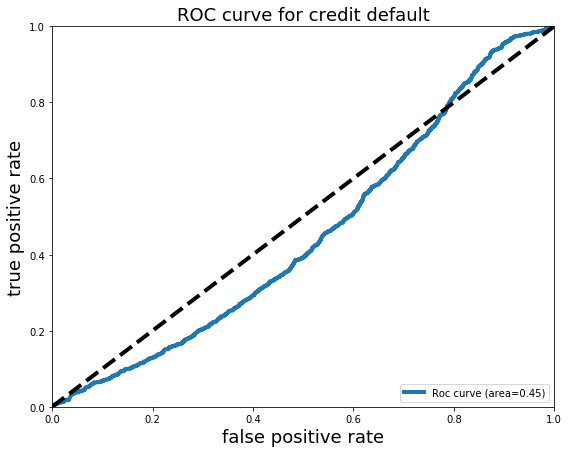

In [114]:
# plot roc curve and calculate auc
plot_roc(sgd_prob)

Weak learner 0 R^2: -0.5743005032062736
Weak learner 20 R^2: -0.0006870387351551877
Weak learner 40 R^2: -0.00037457012354091823
Weak learner 60 R^2: -0.0003916726447155128
Weak learner 80 R^2: -0.00025771754449377404
Weak learner 100 R^2: -0.00013904573769596418


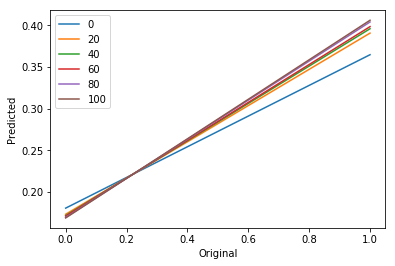

Overall R^2:
0.4886214244113434


In [115]:
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
preds = pd.DataFrame()
labels = []
uniquex = credit['default_target'].unique()

for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,Y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    Y = Y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, Y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(credit['default_target'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(credit['default_target'], predicted)[0, 1])

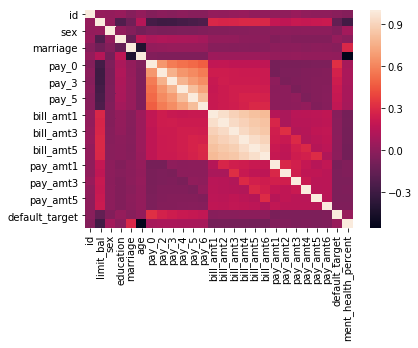

In [116]:
sns.heatmap(credit.corr())

In [117]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

# Look at the R^2 scores on train and test
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.7711348957789412
0.08964196639094935


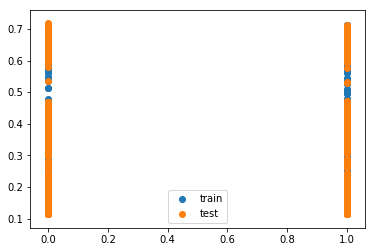

In [119]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions with our model
train_predictions = rfr.predict(X_train)
test_predictions = rfr.predict(X_test)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(y_train, train_predictions, label='train')
plt.scatter(y_test, test_predictions, label='test')
plt.legend()
plt.show()

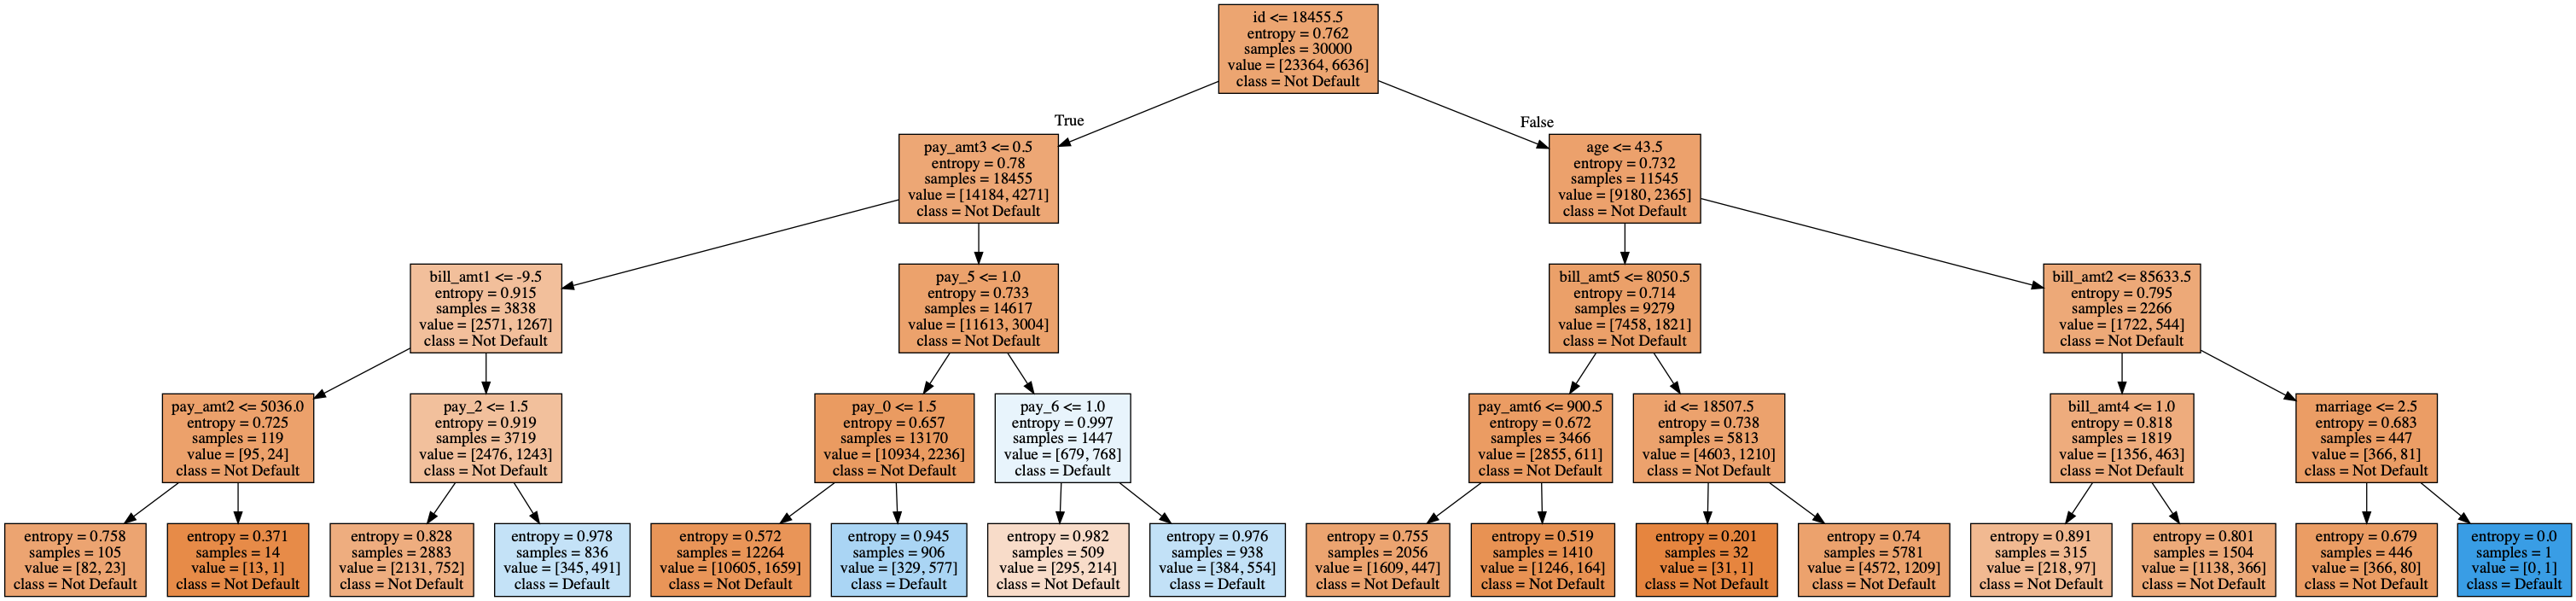

In [120]:
default = credit['default_target']

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(credit, default)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=credit.columns,
    class_names=['Not Default', 'Default'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [121]:
 print(cross_val_score(decision_tree, X2, Y2, cv=10)) 

[0.78773742 0.79006998 0.79673442 0.79006998 0.79066667 0.79533333
 0.80393464 0.7975992  0.79959987 0.80493498]
